<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 3.2.2 
# *Mining Social Media with Twitter*

## The Twitter API and Tweepy Package

The Twitter API provides access to tweets and comments, and allows an application to post tweets to the user's timeline. 

Twitter requires developers to create and authenticate an app before they can use the API. As of recent policy changes, however, new developers must be approved before they can create an app. There is no indication of the waiting period for approval.

### 1. Apply for Developer Access

Go to https://blog.twitter.com/developer/en_us/topics/tools/2018/new-developer-requirements-to-protect-our-platform.html
and read the advice.

Apply at https://developer.twitter.com/en/apply-for-access.html. Where asked state that you will use the app as a student to explore the tweepy Python library and use it to fetch recent tweets and to create/delete a tweet.

### 2. Create Your Twitter App
Go to https://developer.twitter.com/en/portal/projects-and-apps and click on the "+ Create App" button. Give your app a name and then you will be able to generate Consumer Keys (API key & secret) and Authentication Tokens (Access token & secret). Copy-paste these authentication details for use in this lab.

### 3. Load Python Libraries

In [1]:
!pip install tweepy

In [1]:
import tweepy
import json
import pprint

### 4. Authenticate from your Python script

You could assign your authentication details explicitly, as follows:

In [4]:
my_consumer_key = 'GS7kRxkpveBFqpey6myCwJ01d'      # your consumer key (string) goes in here
my_consumer_secret = 'gGc9bnCGYQvjDY8M47foKmRSdl6FuFqmOIAOIJMn4M39rIlXUT'   # your consumer secret key (string) goes in here
my_access_token = '82147042-L7wiMqxZqib6XiLdpphwskaKGKfEjZfMw4mhEdMOr'      # your access token (string) goes in here
access_token_secret = 'EZvfP55xXAmqymu3SpDL8yxVKVOe9DFYYFwfiaBbMWckW'  # your access token secret (string) goes in here

In [2]:
import json

auth_twitter_json = {
    'consumer_key': 'GS7kRxkpveBFqpey6myCwJ01d'      # your consumer key (string) goes in here
    , 'consumer_secret': 'gGc9bnCGYQvjDY8M47foKmRSdl6FuFqmOIAOIJMn4M39rIlXUT'   # your consumer secret key (string) goes in here
    , 'access_token': '82147042-L7wiMqxZqib6XiLdpphwskaKGKfEjZfMw4mhEdMOr'      # your access token (string goes in here
    , 'access_token_secret': 'EZvfP55xXAmqymu3SpDL8yxVKVOe9DFYYFwfiaBbMWckW'  # your access token secret (string) goes in here
}

with open('auth_twitter.json', 'w') as outfile:  
    json.dump(auth_twitter_json, outfile)


A better way would be to store these details externally, so they are not displayed in the notebook:

- create a file called "auth_twitter.json" in your "notebooks" directory, and save your credentials there in JSON format:

`{`<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;`   "consumer_key": "your consumer key (string) goes in here",` <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;` "consumer_secret": "your consumer secret key (string) goes in here",` <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;`"access_token": "your access token (string) goes in here",` <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;`"access_token_secret": "your access token secret (string) goes in here"` <br>
`}`

(Nb. Parsers are very fussy. Make sure each key:value pair has a comma after it except the last one!)  

Use the following code to load the credentials:  

In [3]:
pwd()  # make sure your working directory is where the file is

'C:\\Users\\victo\\Downloads'

In [4]:
path_auth = 'auth_twitter.json'
auth = json.loads(open(path_auth).read())
pp = pprint.PrettyPrinter(indent=4)
# For debugging only:
pp.pprint(auth)

{   'access_token': '82147042-L7wiMqxZqib6XiLdpphwskaKGKfEjZfMw4mhEdMOr',
    'access_token_secret': 'EZvfP55xXAmqymu3SpDL8yxVKVOe9DFYYFwfiaBbMWckW',
    'consumer_key': 'GS7kRxkpveBFqpey6myCwJ01d',
    'consumer_secret': 'gGc9bnCGYQvjDY8M47foKmRSdl6FuFqmOIAOIJMn4M39rIlXUT'}


In [7]:
my_consumer_key = auth['consumer_key']
my_consumer_secret = auth['consumer_secret']
my_access_token = auth['access_token']
my_access_token_secret = auth['access_token_secret']

Security considerations: 
- this method only keeps your credentials invisible as long as nobody accesses this notebook while it's running on your computer 
- if you wanted another user to have access to the executable notebook without divulging your credentials you should set up an OAuth 2.0 workflow to let them obtain and apply their own API tokens when using your app
- if you just want to share your analyses, you could use a separate script (which you don't share) to fetch the data and save it locally, then use a second notebook (with no API access) to load and analyse the locally stored data

### 5. Exploring the API

Here is how to connect to Twitter using the Tweepy library:

In [8]:
auth = tweepy.OAuthHandler(my_consumer_key, my_consumer_secret)
auth.set_access_token(my_access_token, my_access_token_secret)
api = tweepy.API(auth)

In the next cell, put the cursor after the '.' and hit the [tab] key to see the available members and methods in the response object:

In [10]:
api.followers()[0]._json

{'id': 1169320255375781888,
 'id_str': '1169320255375781888',
 'name': 'Abdυlra7mαn 🌐',
 'screen_name': 'Abdulra7man_M_H',
 'location': '',
 'description': '#Freelance_Translator (En🔄Ar) |                          \n#Logo_Designer 🎨 | #Video_Editor 🎞 | ve Türk dilini seviyorum',
 'url': None,
 'entities': {'description': {'urls': []}},
 'protected': False,
 'followers_count': 206,
 'friends_count': 1897,
 'listed_count': 0,
 'created_at': 'Wed Sep 04 18:44:27 +0000 2019',
 'favourites_count': 350,
 'utc_offset': None,
 'time_zone': None,
 'geo_enabled': False,
 'verified': False,
 'statuses_count': 149,
 'lang': None,
 'status': {'created_at': 'Mon Jun 01 00:58:26 +0000 2020',
  'id': 1267259174687301632,
  'id_str': '1267259174687301632',
  'text': '#مكتشف_علاج\nمن عجائب زمن #كورونا أن يظهر بين حين وآخر اسم جديد لمكتشف علاج همشته الحكومات، بينما يرتكز تقدم العلم ا… https://t.co/Is42HMmTzT',
  'truncated': True,
  'entities': {'hashtags': [{'text': 'مكتشف_علاج', 'indices': [0, 11]},
  

In [10]:
api.followers()[2]._json

{'id': 1399347949524692998,
 'id_str': '1399347949524692998',
 'name': '4K Streaming',
 'screen_name': 'Streams1Elite',
 'location': 'England, United Kingdom',
 'description': "12000 LIVE CHANNELS 50K VOD'S",
 'url': None,
 'entities': {'description': {'urls': []}},
 'protected': False,
 'followers_count': 114,
 'friends_count': 895,
 'listed_count': 0,
 'created_at': 'Mon May 31 12:52:42 +0000 2021',
 'favourites_count': 123,
 'utc_offset': None,
 'time_zone': None,
 'geo_enabled': False,
 'verified': False,
 'statuses_count': 312,
 'lang': None,
 'status': {'created_at': 'Wed Aug 04 18:55:05 +0000 2021',
  'id': 1422994515615490049,
  'id_str': '1422994515615490049',
  'text': '@carling_4737 If you are looking for a service for a reliable TV, please contact us. You will be given a free trial for the first 24 hours.',
  'truncated': False,
  'entities': {'hashtags': [],
   'symbols': [],
   'user_mentions': [{'screen_name': 'carling_4737',
     'name': 'Paul E2 Spurs',
     'id': 1092

Consult the Tweept and Twitter API documentation. Print a few of the response members below:

In [11]:
# Retrieve a Twitter user object
obama = api.get_user('michelleobama')

In [12]:
obama.status

Status(_api=<tweepy.api.API object at 0x000001A8FB2DCD60>, _json={'created_at': 'Wed Aug 04 18:53:17 +0000 2021', 'id': 1422994065767927809, 'id_str': '1422994065767927809', 'text': 'RT @ObamaFoundation: 🎉 Happy Birthday, @BarackObama!\n \nPresident Obama has always enjoyed hearing about the good work people are doing to m…', 'truncated': False, 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'ObamaFoundation', 'name': 'The Obama Foundation', 'id': 2293315159, 'id_str': '2293315159', 'indices': [3, 19]}, {'screen_name': 'BarackObama', 'name': 'Barack Obama', 'id': 813286, 'id_str': '813286', 'indices': [39, 51]}], 'urls': []}, 'source': '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>', 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'geo': None, 'coordinates': None, 'place': None, 'contributors': None, 'retwee

This will fetch recent tweets from accounts you follow:

In [11]:
# Recent tweets from accounts you follow:
tweets = api.home_timeline()
for tweet in tweets:
    print(tweet.text)

RT @ACABNATlON: PERRY THE PLATYPUS IS A BASTARD https://t.co/KRXrbMVELT
RT @cricmash: 1 June 2002 Hansie Cronje crashes to his death 
by @senantix 

#cricket #onthisday #death

https://t.co/uxUpuZUtps
1 June 2002 Hansie Cronje crashes to his death 
#cricket #onthisday 

https://t.co/dcgnjoHrZ4
This morning's @EveningStandard #protests2020 #BlackLivesMatter #GeorgeFloyd #Christo #cartoon https://t.co/1MB2U8C5X1
*Ding ding* In the blue corner... @brendan_pang! #MasterChefAU https://t.co/uEAGAvX8vK
RT @cricmash: 1 June 1887 When batsmen threw their wickets away because there was no concept of declaration 
by @ovshake42 

#cricket #onth…
andyzing: 2x 20KG Adjustable Dumbbell/Barbell $85.40 + Shipping @ Dshop https://t.co/RfYOhhmepe
On this day: Born June 2, 1980: Abby Wambach, American soccer player https://t.co/bVuCl4zSiZ https://t.co/es03j2L1GG
Pristine Solar: [VIC] 6.6kW Jinko 370W Solar Panels + 5kW Fronius Inverter Fully Installed from $3,511 ($1,623 Upfr… https://t.co/2k6fdMNHkJ
bobb

The request to see your own recent tweets is similar, but uses the `user_timeline` endpoint. Try this below:

In [13]:
#ANSWER:
# Your recent tweets:
tweets = api.user_timeline()
for tweet in tweets:
    print(tweet.text)

RT @ICC: Bangladesh lead the five-match T20I series 2-0!

Afif Hossain and Nurul Hasan share an unbeaten 56-run stand to guide their side t…
Bangladesh should win comfortably. https://t.co/mdioPkB27j
@Mustafiz90 on a hat-trick!
Australian batsmen are out of idea here. Surprised to watch them clueless. #BANvAUS
@iSoumikSaheb @ArshIftikhar @Gmaxi_32 They GEO blocked outside Bangladesh I guess. Nothing in their channel.
@ImRiyad1 @BCBtigers @CricketAus @kayosports @FoxCricket @RajabetsTV Thanks. But I was looking for legal stream.
How do we watch #BANvAUS T20I series from Australia? @BCBtigers @CricketAus @kayosports @FoxCricket
@BCBtigers You need a decent graphic designer in your team. FFS.
Crazy! https://t.co/fhoJ67D0UM
RT @ICC: Bangladesh win their first-ever T20I against Australia ✨

Nasum Ahmed's sensational performance of 4/19 helps the hosts clinch a 2…
RT @BillBramhall: Cartoon https://t.co/1XvT1Wjiyi
@kayosports @FoxCricket https://t.co/vJ3oQnDjJL
Where is #BANvAUS T20I @kayospo

Now, instead of printing the text of each tweet, print the `created_at` and `id_str` methods:

In [14]:
#ANSWER:
# tweets header info
tweets = api.user_timeline()
for tweet in tweets:
    print(tweet.created_at)
#     print(tweet.id_str)
    print(tweet.text)

2021-08-04 20:41:15
RT @ICC: Bangladesh lead the five-match T20I series 2-0!

Afif Hossain and Nurul Hasan share an unbeaten 56-run stand to guide their side t…
2021-08-04 13:35:36
Bangladesh should win comfortably. https://t.co/mdioPkB27j
2021-08-04 13:19:49
@Mustafiz90 on a hat-trick!
2021-08-04 13:18:17
Australian batsmen are out of idea here. Surprised to watch them clueless. #BANvAUS
2021-08-04 13:05:49
@iSoumikSaheb @ArshIftikhar @Gmaxi_32 They GEO blocked outside Bangladesh I guess. Nothing in their channel.
2021-08-04 13:02:52
@ImRiyad1 @BCBtigers @CricketAus @kayosports @FoxCricket @RajabetsTV Thanks. But I was looking for legal stream.
2021-08-04 11:27:32
How do we watch #BANvAUS T20I series from Australia? @BCBtigers @CricketAus @kayosports @FoxCricket
2021-08-04 10:21:03
@BCBtigers You need a decent graphic designer in your team. FFS.
2021-08-04 07:57:25
Crazy! https://t.co/fhoJ67D0UM
2021-08-03 22:24:51
RT @ICC: Bangladesh win their first-ever T20I against Australia ✨

Nas

In [15]:
tweets = api.user_timeline()
tweet_list = []
for tweet in tweets:
    tweet_list.append(tweet._json)

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

In [17]:
df = pd.DataFrame(tweet_list)

In [18]:
df['created_at'] = pd.to_datetime(df['created_at'])
df.set_index('created_at', inplace=True)

In [19]:
df.head()

,id,id_str,text,truncated,entities,source,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,...,retweet_count,favorite_count,favorited,retweeted,lang,quoted_status_id,quoted_status_id_str,quoted_status,possibly_sensitive,extended_entities
created_at,,,,,,,,,,,,,,,,,,,,,
2021-08-04 20:41:15+00:00,1423021236192374790,1423021236192374790,RT @ICC: Bangladesh lead the five-match T20I s...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/android"" ...",NaN,None,NaN,None,...,302,0,True,True,en,NaN,NaN,NaN,NaN,NaN
2021-08-04 13:35:36+00:00,1422914115161399296,1422914115161399296,Bangladesh should win comfortably. https://t.c...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/android"" ...",NaN,None,NaN,None,...,0,0,False,False,en,1.422914e+18,1422913728958406656,{'created_at': 'Wed Aug 04 13:34:04 +0000 2021...,False,NaN
2021-08-04 13:19:49+00:00,1422910144417992707,1422910144417992707,@Mustafiz90 on a hat-trick!,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/android"" ...",NaN,None,3.247896e+09,3247896487,...,0,0,False,False,en,NaN,NaN,NaN,NaN,NaN
2021-08-04 13:18:17+00:00,1422909759208837124,1422909759208837124,Australian batsmen are out of idea here. Surpr...,False,"{'hashtags': [{'text': 'BANvAUS', 'indices': [...","<a href=""http://twitter.com/download/android"" ...",NaN,None,NaN,None,...,0,0,False,False,en,NaN,NaN,NaN,NaN,NaN
2021-08-04 13:05:49+00:00,1422906619222904836,1422906619222904836,@iSoumikSaheb @ArshIftikhar @Gmaxi_32 They GEO...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/android"" ...",1.422906e+18,1422906067168620544,7.510288e+08,751028754,...,0,2,False,False,en,NaN,NaN,NaN,NaN,NaN


In [20]:
df.dtypes

id                             int64
id_str                        object
text                          object
truncated                       bool
entities                      object
source                        object
in_reply_to_status_id        float64
in_reply_to_status_id_str     object
in_reply_to_user_id          float64
in_reply_to_user_id_str       object
in_reply_to_screen_name       object
user                          object
geo                           object
coordinates                   object
place                         object
contributors                  object
retweeted_status              object
is_quote_status                 bool
retweet_count                  int64
favorite_count                 int64
favorited                       bool
retweeted                       bool
lang                          object
quoted_status_id             float64
quoted_status_id_str          object
quoted_status                 object
possibly_sensitive            object
e

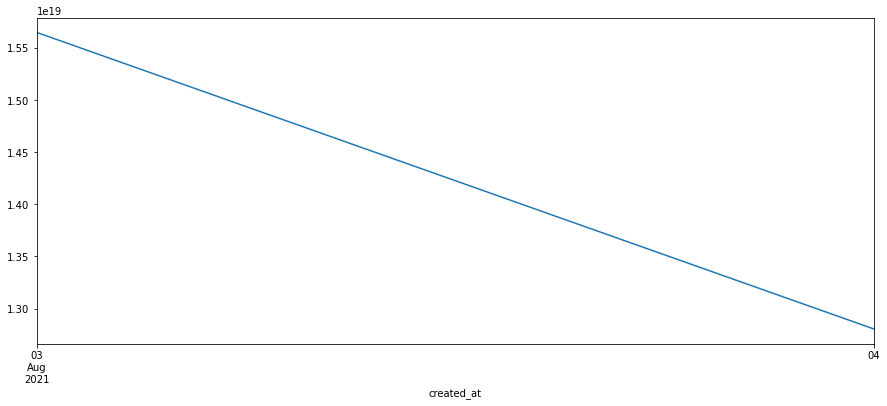

In [21]:
y = df['id'].resample('D').sum()
y.plot(figsize=(15, 6));

In [ ]:
#plot below is extracted from answer (better example as more activity)

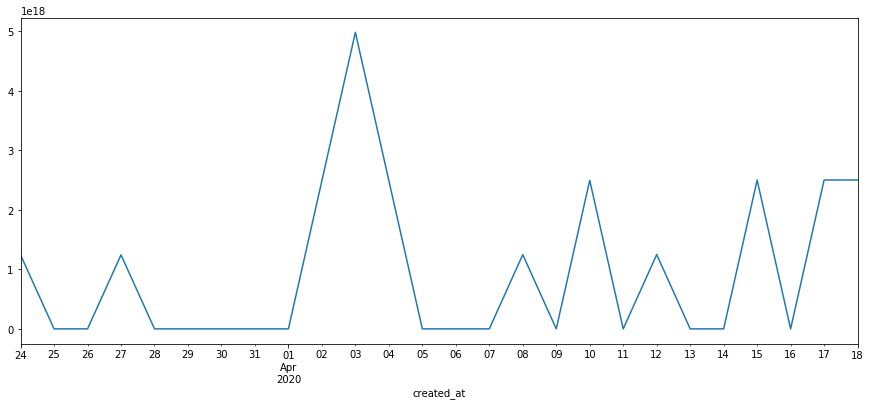

In [24]:
!pip install wordcloud

In [32]:
!pip install textblob

In [33]:
from wordcloud import WordCloud, STOPWORDS
from textblob import TextBlob

In [34]:
def check_tweets(twitter_handle):
    json_str = []
    for status in tweepy.Cursor(api.user_timeline,id=twitter_handle).items(200):
        json_str.append(status._json)
    
    df = pd.DataFrame(json_str)
    df['created_at'] = pd.to_datetime(df['created_at'])
    df.set_index('created_at', inplace=True)
    
    y = df['id'].resample('D').count()
    y.plot(figsize=(15, 6))
    plt.show();

In [35]:
def check_tweets_wordcloud(twitter_handle, withall=True):
    json_str = []
    for status in tweepy.Cursor(api.user_timeline,id=twitter_handle).items(200):
        json_str.append(status._json)
    
    df = pd.DataFrame(json_str)
    
    if withall: 
        text = df.text.values
    else:
        text = ','.join([x for x in df.text.values])
        blob = TextBlob(text)
        text = blob.noun_phrases
    
    wordcloud = WordCloud(
        width = 3000
        , height = 2000
        , background_color = 'black'
        , stopwords = STOPWORDS
    ).generate(str(text))
    
    fig = plt.figure(figsize = (40, 30), facecolor = 'k', edgecolor = 'k')
    plt.imshow(wordcloud, interpolation = 'bilinear')
    plt.axis('off')
    plt.show();

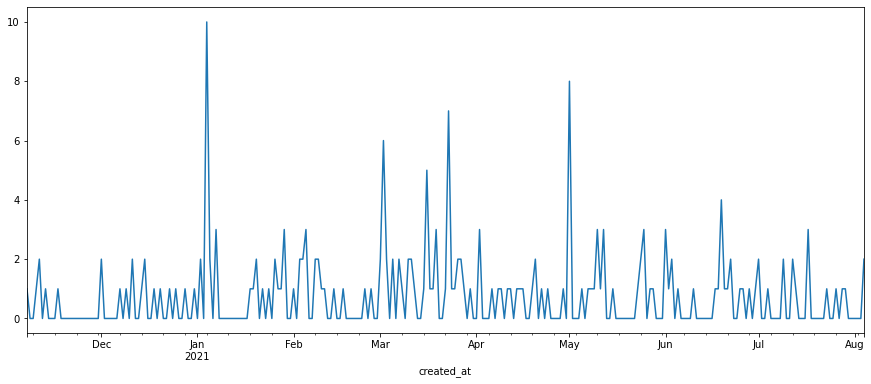

In [36]:
check_tweets('michelleobama')

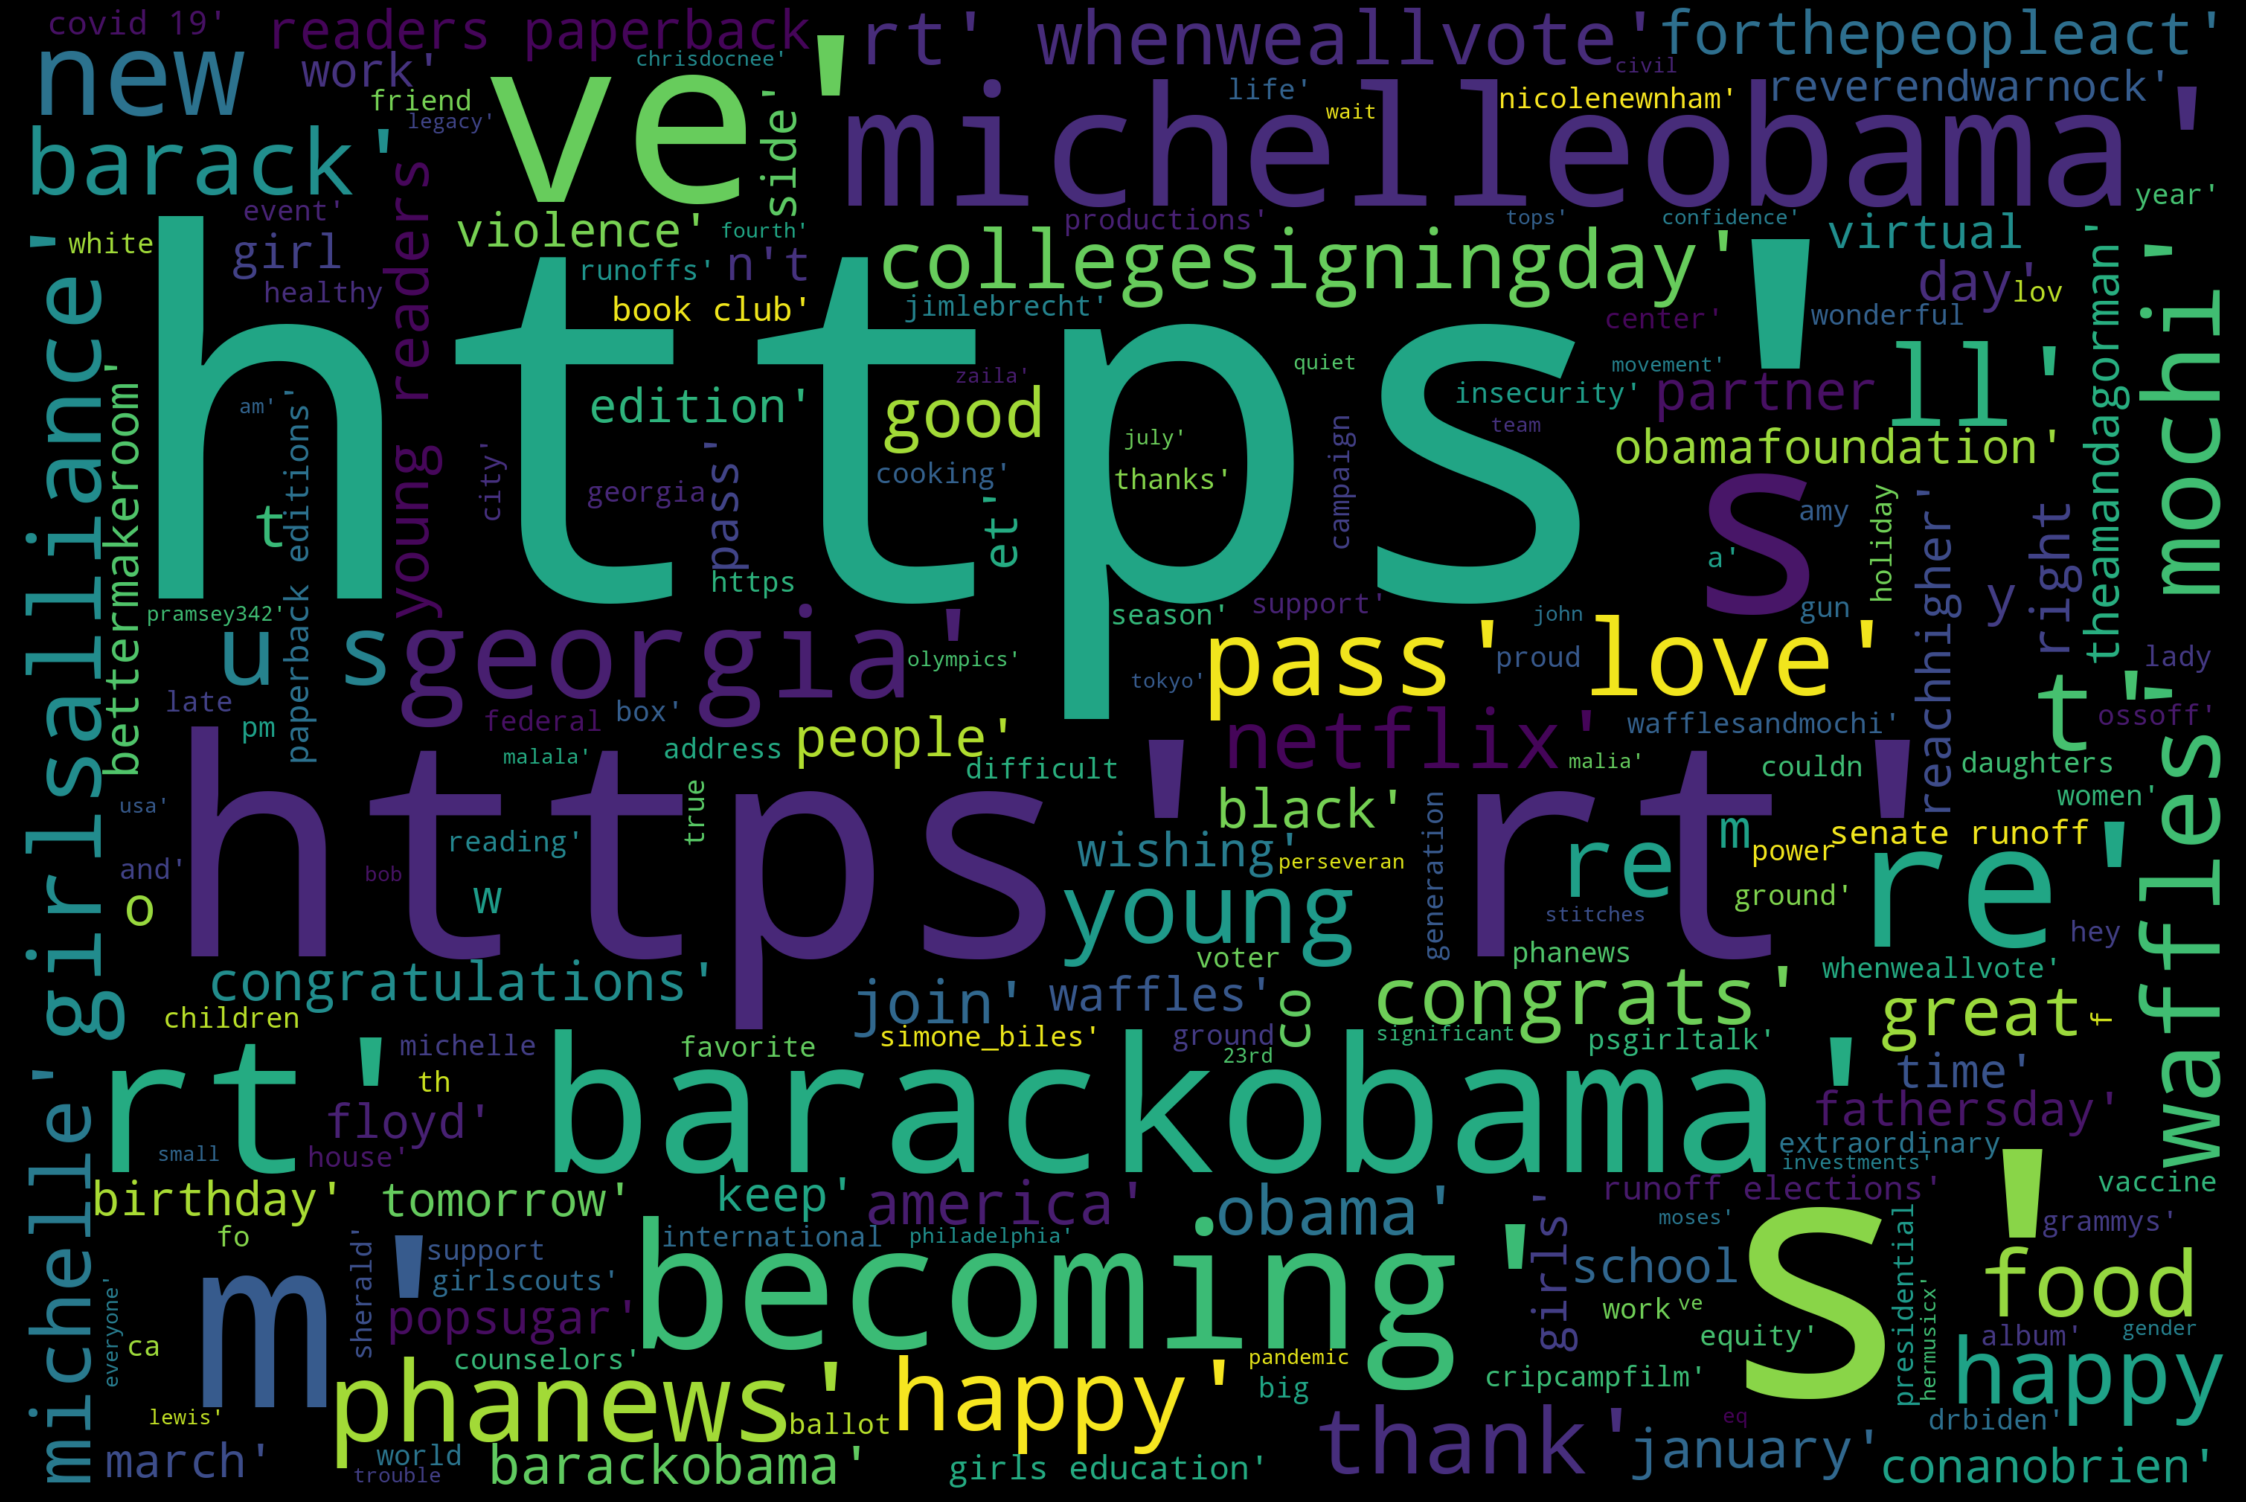

In [39]:
check_tweets_wordcloud('michelleobama', withall=False)

You can create a tweet as follows:

In [40]:
# create a tweet:
tweet = api.update_status('Test: Made with Tweepy')

(Nb. Don't abuse this feature! If you try to generate a zillion tweets in a loop, Twitter will ban youur account.)

Tweets can be deleted by reference to their `id_str` attribute:

In [41]:
# delete a tweet:
status = api.destroy_status(tweet.id_str)

You can follow a Tweeter:

In [42]:
# follow:
api.create_friendship('@YouTube')

User(_api=<tweepy.api.API object at 0x000001A8FB2DCD60>, _json={'id': 10228272, 'id_str': '10228272', 'name': 'YouTube', 'screen_name': 'YouTube', 'location': 'San Bruno, CA', 'description': 'tag us with your #PermissiontoDance #Shorts 💜', 'url': 'https://t.co/kjUK7E8YAQ', 'entities': {'url': {'urls': [{'url': 'https://t.co/kjUK7E8YAQ', 'expanded_url': 'https://www.youtube.com/shorts/H12SwqwR2NE', 'display_url': 'youtube.com/shorts/H12Swqw…', 'indices': [0, 23]}]}, 'description': {'urls': []}}, 'protected': False, 'followers_count': 73063557, 'friends_count': 1197, 'listed_count': 79315, 'created_at': 'Tue Nov 13 21:43:46 +0000 2007', 'favourites_count': 5696, 'utc_offset': None, 'time_zone': None, 'geo_enabled': False, 'verified': True, 'statuses_count': 35105, 'lang': None, 'status': {'created_at': 'Wed Aug 04 19:42:40 +0000 2021', 'id': 1423006492840636417, 'id_str': '1423006492840636417', 'text': '@jackieaina Happy birthday, Jackie 🎉 Hope you have a wonderful day! https://t.co/OCgD

or unfollow:

In [43]:
# unfollow:
api.destroy_friendship('@YouTube')

User(_api=<tweepy.api.API object at 0x000001A8FB2DCD60>, _json={'id': 10228272, 'id_str': '10228272', 'name': 'YouTube', 'screen_name': 'YouTube', 'location': 'San Bruno, CA', 'description': 'tag us with your #PermissiontoDance #Shorts 💜', 'url': 'https://t.co/kjUK7E8YAQ', 'entities': {'url': {'urls': [{'url': 'https://t.co/kjUK7E8YAQ', 'expanded_url': 'https://www.youtube.com/shorts/H12SwqwR2NE', 'display_url': 'youtube.com/shorts/H12Swqw…', 'indices': [0, 23]}]}, 'description': {'urls': []}}, 'protected': False, 'followers_count': 73063557, 'friends_count': 1197, 'listed_count': 79315, 'created_at': 'Tue Nov 13 21:43:46 +0000 2007', 'favourites_count': 5696, 'utc_offset': None, 'time_zone': None, 'geo_enabled': False, 'verified': True, 'statuses_count': 35105, 'lang': None, 'status': {'created_at': 'Wed Aug 04 19:42:40 +0000 2021', 'id': 1423006492840636417, 'id_str': '1423006492840636417', 'text': '@jackieaina Happy birthday, Jackie 🎉 Hope you have a wonderful day! https://t.co/OCgD

>
>
>
>
>

>
>




---



---



> > > > > > > > > © 2021 Institute of Data


---



---



